In [6]:
%pylab inline
from scipy import integrate
import csv
plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
plt.rc('text', usetex=True)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [7]:
#resistivity

Tpdcro2=[]
rhopdcro2=[]
with open('pdcro2.csv', newline='') as csvfile:
    filereader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in filereader:
        Tpdcro2.append(float(row[0]))
        rhopdcro2.append(float(row[1]))

Tpdcro2=np.array(Tpdcro2)
rhopdcro2=np.array(rhopdcro2)
       
Tpdcoo2=[]
rhopdcoo2=[]
with open('pdcoo2.csv', newline='') as csvfile:
    filereader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in filereader:
        Tpdcoo2.append(float(row[0]))
        rhopdcoo2.append(float(row[1]))
        
Tpdcoo2=np.array(Tpdcoo2)  
rhopdcoo2=np.array(rhopdcoo2)  


#heat capacity

T_cp_pdcro2=[]
cp_pdcro2=[]
with open('pdcro2_cv.csv', newline='') as csvfile:
    filereader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in filereader:
        T_cp_pdcro2.append(float(row[0]))
        cp_pdcro2.append(float(row[1]))

T_cp_pdcro2=np.array(T_cp_pdcro2)
cp_pdcro2=np.array(cp_pdcro2)
       
T_cp_pdcoo2=[]
cp_pdcoo2=[]
with open('pdcoo2_cv.csv', newline='') as csvfile:
    filereader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in filereader:
        T_cp_pdcoo2.append(float(row[0]))
        cp_pdcoo2.append(float(row[1]))
        
T_cp_pdcoo2=np.array(T_cp_pdcoo2)  
cp_pdcoo2=np.array(cp_pdcoo2)  


#entropy

T_cp_pdcro2=np.array(T_cp_pdcro2)
cp_pdcro2=np.array(cp_pdcro2)



T_cp_pdcoo2=np.array(T_cp_pdcoo2)  
cp_pdcoo2=np.array(cp_pdcoo2)  

#### thermal conductivity
T_kap_pdcoo2=[]
kappdcoo2=[]
with open('thermal_condcr.csv', newline='') as csvfile:
    filereader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in filereader:
        T_kap_pdcoo2.append(float(row[0]))
        kappdcoo2.append(float(row[1]))
        
T_kap_pdcoo2=np.array(T_kap_pdcoo2)  
kappdcoo2=np.array(kappdcoo2)  





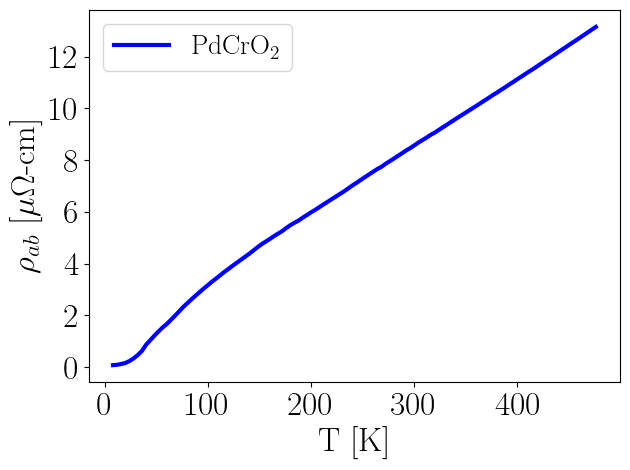

In [8]:
plt.plot(Tpdcro2,rhopdcro2, lw=3, c='b', label='PdCrO$_2$')
# plt.plot(Tpdcoo2,rhopdcoo2, lw=3, c='r', label='PdCoO$_2$')
plt.xlabel('T [K]',size=24)
plt.ylabel(r'$\rho_{ab}$ [$\mu \Omega$-cm]',size=24)
plt.yticks(size=24)
plt.xticks(size=24)
plt.legend( prop={'size': 20})
plt.tight_layout()
plt.savefig("fig1_cr.png", dpi=400)

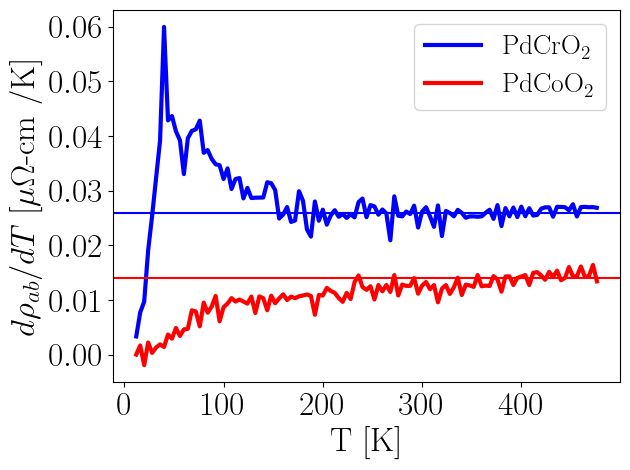

In [9]:
dtco=Tpdcoo2[1]-Tpdcoo2[0]
plt.plot(Tpdcro2[1:],np.diff(rhopdcro2)/dtco, lw=3, c='b', label='PdCrO$_2$')
plt.plot(Tpdcoo2[1:],np.diff(rhopdcoo2)/dtco, lw=3, c='r', label='PdCoO$_2$')
plt.axhline(0.026, c='b')
plt.axhline(0.014, c='r')
plt.xlabel('T [K]',size=24)
plt.ylabel(r'$d\rho_{ab}/dT$ [$\mu \Omega$-cm /K]',size=24)
plt.yticks(size=24)
plt.xticks(size=24)
plt.legend( prop={'size': 20})
plt.tight_layout()
plt.savefig("fig1.png", dpi=400)

In [10]:
c=18.087*(1e-10) #in meters  #from sunkos thesis
a=2.93*(1e-10) #in meters  #from sunkos thesis
dbz=2*np.pi/(c/3)
Abz=8*np.pi*np.pi*np.sqrt(3)/(3*a*a) #in 1/m^2 

Vbz=Abz*dbz
fracvol=Vbz/2
spin_deg=2 #from sum over spins
n_cr=spin_deg*fracvol/((2*np.pi)**3) #m-3 #extra factor of 1/(2pi)^3 from the momentum space integral 
me=9.1093837*1e-31 #kg
m_cr=1.5*me 
e=1.6021*1e-19 #c
hbar=1.05457*1e-34 # m2 kg / s
kb=1.3806*1e-23 #m2 kg s-2 K-1

In [11]:
fac_pre=(hbar/kb)*e*e*n_cr/m_cr

In [12]:
alpha_andy=0.9
n_cr_andy=alpha_andy*m_cr*(kb/hbar)*(1/(e*e*(0.025*1e-8)))
print(n_cr_andy,n_cr)
cmvol=(1/100)**3
print(n_cr_andy*cmvol,n_cr*cmvol)
print("these densities are approximately one third of that of elemental metals Ag and Au which are nearby in the periodic table")
print("my density is a bit lower since the FL is a little above half filling in the actual material")

2.508972903657199e+28 2.230944897654038e+28
2.5089729036571992e+22 2.2309448976540384e+22
these densities are approximately one third of that of elemental metals Ag and Au which are nearby in the periodic table
my density is a bit lower since the FL is a little above half filling in the actual material


In [13]:
fac=fac_pre*1e-8 #to convert 1/(Ohm m) cm to 1/(muOhm)


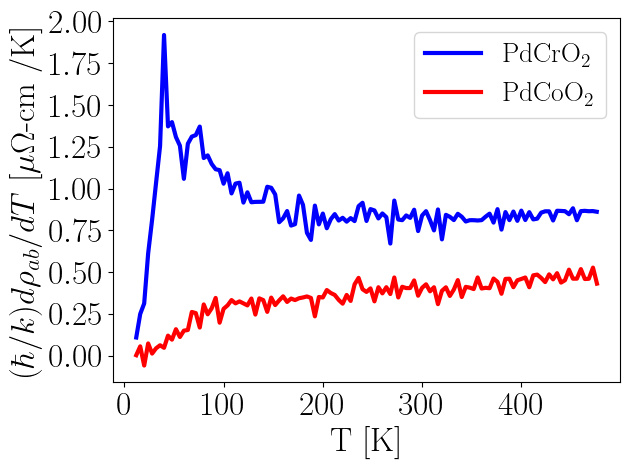

In [14]:
dtco=Tpdcoo2[1]-Tpdcoo2[0]
plt.plot(Tpdcro2[1:],fac*np.diff(rhopdcro2)/dtco, lw=3, c='b', label='PdCrO$_2$')
plt.plot(Tpdcoo2[1:],fac*np.diff(rhopdcoo2)/dtco, lw=3, c='r', label='PdCoO$_2$')
# plt.axhline(0.026, c='b')
# plt.axhline(0.014, c='r')
plt.xlabel('T [K]',size=24)
plt.ylabel(r'$ (\hbar /k )d\rho_{ab}/dT$ [$\mu \Omega$-cm /K]',size=24)
plt.yticks(size=24)
plt.xticks(size=24)
plt.legend( prop={'size': 20})
plt.tight_layout()
plt.savefig("fig1.png", dpi=400)

In [15]:
alpha_me=fac*0.026
alpha_me

0.832278587449219

In [16]:
#transport times
muOhmcm_to_Ohmm=1e-8
Tau_inv_pdcoo2=n_cr*e*e*np.array(rhopdcoo2)*muOhmcm_to_Ohmm/m_cr
Tau_inv_pdcro2=n_cr*e*e*np.array(rhopdcro2)*muOhmcm_to_Ohmm/m_cr
Deltau=Tau_inv_pdcro2-Tau_inv_pdcoo2

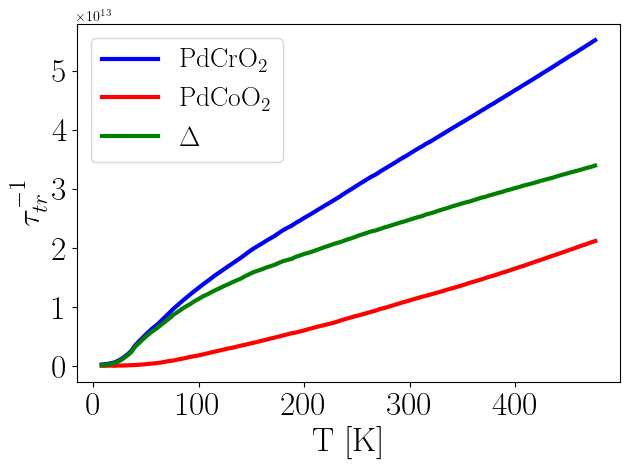

In [17]:
plt.plot(Tpdcro2,Tau_inv_pdcro2, lw=3, c='b', label='PdCrO$_2$')
plt.plot(Tpdcoo2,Tau_inv_pdcoo2, lw=3, c='r', label='PdCoO$_2$')
plt.plot(Tpdcro2,Tau_inv_pdcro2-Tau_inv_pdcoo2, lw=3, c='g', label='$\Delta$')

plt.xlabel('T [K]',size=24)
plt.ylabel(r'$\tau_{tr}^{-1}$',size=24)
plt.yticks(size=24)
plt.xticks(size=24)
plt.legend( prop={'size': 20})
plt.tight_layout()
plt.savefig("fig1_cr.png", dpi=400)

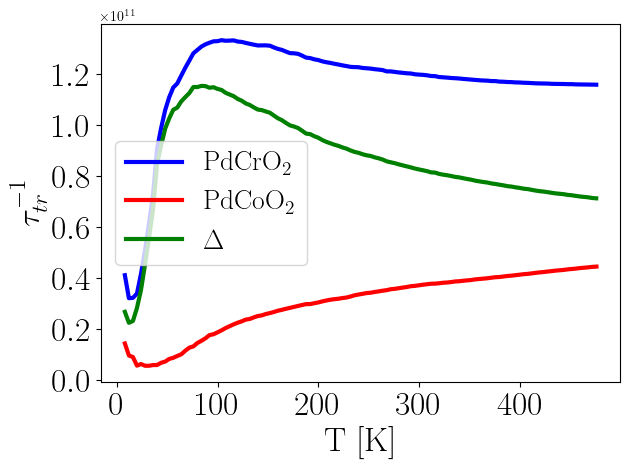

In [18]:
plt.plot(Tpdcro2,Tau_inv_pdcro2/Tpdcro2, lw=3, c='b', label='PdCrO$_2$')
plt.plot(Tpdcoo2,Tau_inv_pdcoo2/Tpdcoo2, lw=3, c='r', label='PdCoO$_2$')
plt.plot(Tpdcro2,Tau_inv_pdcro2/Tpdcoo2-Tau_inv_pdcoo2/Tpdcoo2, lw=3, c='g', label='$\Delta$')

plt.xlabel('T [K]',size=24)
plt.ylabel(r'$\tau_{tr}^{-1}$',size=24)
plt.yticks(size=24)
plt.xticks(size=24)
plt.legend( prop={'size': 20})
plt.tight_layout()
plt.savefig("fig1_cr.png", dpi=400)

# Fits to the high temperature resistivity

In [19]:
J=6.25 #in mev
U=4000
g=107
JK=4*g*g/U
mevtoK=11.6045250061598
Tval=J*mevtoK*1.1
print(Tval, 'validity above this temp',J*mevtoK)
print(JK)

S=3.0/2.0
kappa=S*(S+1)/2
alpha=2

#electron Parameters
tp1=568 #in units of Js\
tp2=-tp1*108/568 #/tpp1
tperp=tp1/150
fill=0.5

import Dispersion

#random parameters and integration grid size
size_E=2**8+1
size_Z=2**8+1
save=True
Machine='FMAC'
ed=Dispersion.Dispersion_TB_single_band([tp1,tp2],fill,size_E,Machine)
[dens2,bins,valt,rho ]=[ed.dens2,ed.bins,ed.valt,ed.f2 ]
[nn,earr,Dos]=[ed.nn,ed.earr,ed.Dos]
mu=ed.mu

#dimensionless
lambda_K=4*alpha*kappa*JK*rho(mu)

print(JK)


79.78110941734863 validity above this temp 72.52828128849875
11.449
started calculating filling for chemical potential and dispersion parameters TB_single_band..
Machine arg is, FMAC
reading lattice from... ./Lattices/KgridX1000.npy
reading lattice from... ./Lattices/KgridY1000.npy
norm of Dos, 43.03344160709354 45.58575006211245
sum of the hist, normed? 43.03344160709354
finished calculating filling for chemical potential
Filling: 0.49398550847703115 .... chemical potential: 256.1998125
sum of the hist, normed? 2.0000000000000013
11.449


In [20]:
def A_tau(T,omega_0_D, lambda_0_a):

    size_x=2**8+1
    inti=[]
    for Ts in T:
        ratio=0.5*omega_0_D*mevtoK/Ts
        x = np.linspace(1e-10, np.pi/2-1e-10, size_x)
        dx=x[1]-x[0]
        inti.append(  (1/np.pi)*dx*integrate.romb(  np.sin(x)**4 / (np.sinh(np.sin(x)*ratio)**2) )   )
    ratio=0.5*omega_0_D*mevtoK/T 
    inti_arr=np.array(inti)*(ratio**2)
    
    return (8*np.pi/hbar)*lambda_0_a*kb*T*inti_arr


In [21]:
def E_tau(T,omega_0, lambda_0):
    return (2*np.pi/hbar)*lambda_0*kb*T*((0.5*omega_0*mevtoK/T)/np.sinh((0.5*omega_0*mevtoK/T)))**2 

    

In [22]:
from scipy.optimize import curve_fit
ind=0
poptE, pcov = curve_fit(E_tau, Tpdcoo2[ind:], Tau_inv_pdcoo2[ind:])
print(poptE)
print(pcov)

[36.95531481  0.05531515]
[[5.41791947e-01 2.05188186e-04]
 [2.05188186e-04 1.17111096e-07]]


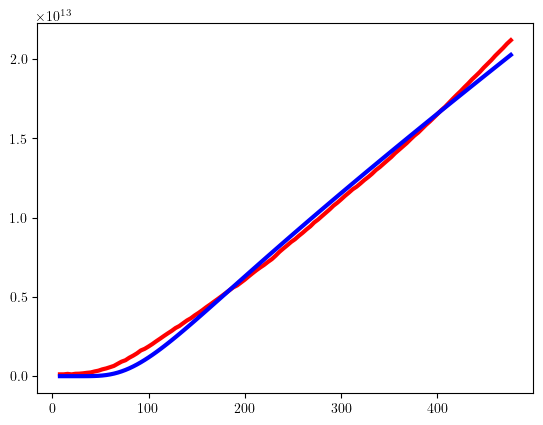

In [23]:
plt.plot(Tpdcoo2,Tau_inv_pdcoo2, lw=3, c='r', label='PdCoO$_2$')
plt.plot(Tpdcoo2,E_tau(Tpdcoo2, poptE[0],poptE[1]), lw=3, c='b', label='PdCoO$_2$')

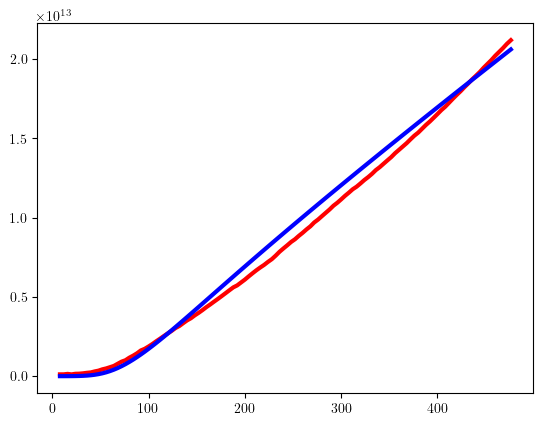

In [24]:
plt.plot(Tpdcoo2,Tau_inv_pdcoo2, lw=3, c='r', label='PdCoO$_2$')
plt.plot(Tpdcoo2,A_tau(Tpdcoo2, poptE[0],poptE[1]), lw=3, c='b', label='PdCoO$_2$')

In [25]:
from scipy.optimize import curve_fit
ind=10
poptA, pcov = curve_fit(A_tau, Tpdcoo2[ind:], Tau_inv_pdcoo2[ind:])
print(poptA)
print(pcov)

[44.18197526  0.0557184 ]
[[7.59484406e-01 2.51536044e-04]
 [2.51536044e-04 1.20108382e-07]]


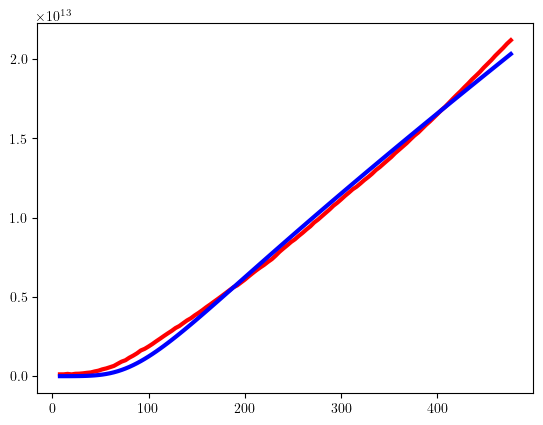

In [26]:
plt.plot(Tpdcoo2,Tau_inv_pdcoo2, lw=3, c='r', label='PdCoO$_2$')
plt.plot(Tpdcoo2,A_tau(Tpdcoo2, poptA[0],poptA[1]), lw=3, c='b', label='PdCoO$_2$')

In [27]:
def EA_tau(T,omega_0_D, lambda_0_a,omega_0, lambda_0):
    return A_tau(T,omega_0_D, lambda_0_a)+E_tau(T,omega_0, lambda_0)

In [28]:
from scipy.optimize import curve_fit
ind=10
lambd=.04


poptEA, pcov = curve_fit(EA_tau, Tpdcoo2[ind:], Tau_inv_pdcoo2[ind:], p0=[ 310/mevtoK,lambd, 1240/mevtoK,lambd*0.63])
print(poptEA)
print(pcov)

[2.86942388e+01 4.28936187e-02 1.20288925e+02 2.38349684e-02]
[[ 1.56016565e-01  1.36295405e-04  7.80344934e-01 -2.54479340e-05]
 [ 1.36295405e-04  1.41114396e-07  9.06232030e-04 -2.76440404e-09]
 [ 7.80344934e-01  9.06232030e-04  7.01456259e+00  3.39562977e-04]
 [-2.54479340e-05 -2.76440404e-09  3.39562977e-04  1.14470884e-07]]


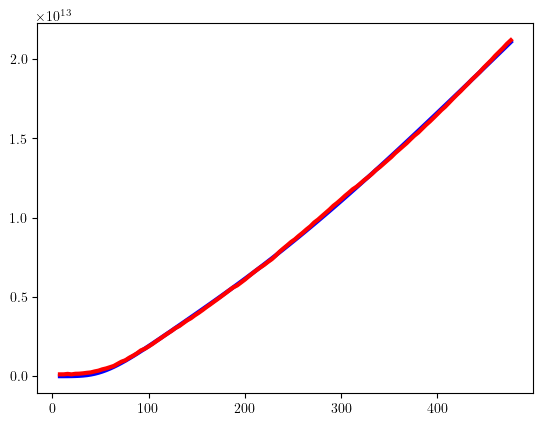

In [29]:
plt.plot(Tpdcoo2,EA_tau(Tpdcoo2, poptEA[0],poptEA[1], poptEA[2],poptEA[3]), lw=3, c='b', label='PdCoO$_2$')
plt.plot(Tpdcoo2,Tau_inv_pdcoo2, lw=3, c='r', label='PdCoO$_2$')

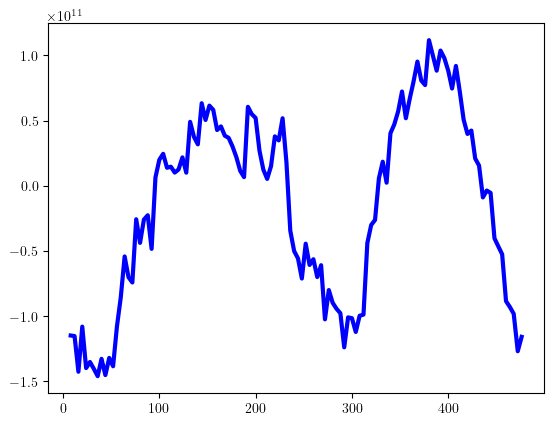

In [30]:
plt.plot(Tpdcoo2,EA_tau(Tpdcoo2, poptEA[0],poptEA[1], poptEA[2],poptEA[3])-Tau_inv_pdcoo2, lw=3, c='b', label='PdCoO$_2$')


In [31]:
print(lambda_K)
JKrightUnits=JK*mevtoK*kb

0.07356915779465499


In [32]:
from scipy.special import spence as dilog2

def Li2(x):
    return dilog2(1-x)

def Li3(x):
    a=[]
    
    for l in x:
        t=np.linspace(1e-7,l,100)
        dt=t[1]-t[0]
        
        a.append(np.trapz(dilog2(1-t)/t)*dt)
        
    return np.array(a)


def Ic(y):

    exp_zero=np.exp(-y)
    exp_zero2=np.exp(y)
    
    return -4*Li2(exp_zero)/y -2*y/(exp_zero2-1) - 4*y + 2*np.pi*np.pi/(3*y) +4*np.log(exp_zero2-1)

def K_tau(T):
    return (2*np.pi/hbar)*lambda_K*JKrightUnits*Ic(alpha*np.pi*J*mevtoK/T)


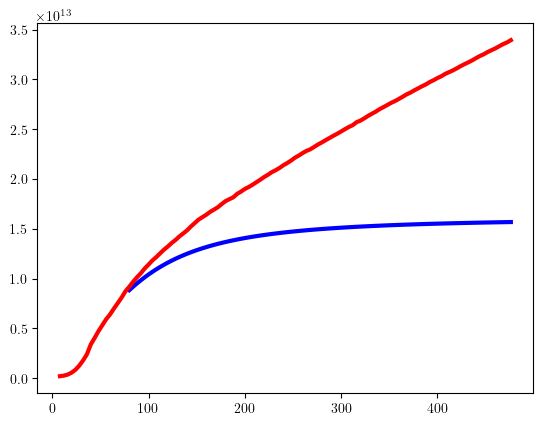

In [33]:
ind=np.argmin((Tval-Tpdcoo2)**2)

plt.plot(Tpdcoo2[ind:],K_tau(Tpdcoo2[ind:]), lw=3, c='b', label='PdCoO$_2$')
plt.plot(Tpdcoo2,Deltau, lw=3, c='r', label='PdCoO$_2$')
# plt.plot(Tpdcoo2[40:],K_tau_aa(Tpdcoo2[40:], 1), lw=3, c='r', label='PdCoO$_2$')

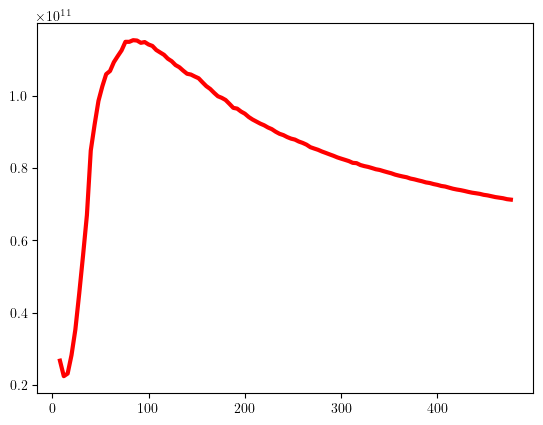

In [34]:
ind=np.argmin((Tval-Tpdcoo2)**2)

# plt.plot(Tpdcoo2[ind:],K_tau(Tpdcoo2[ind:]), lw=3, c='b', label='PdCoO$_2$')
plt.plot(Tpdcoo2,Deltau/Tpdcoo2, lw=3, c='r', label='PdCoO$_2$')


In [35]:
def Jc(y,z):

    eps=1j*1e-17
    exp_sum=np.exp(-z-y)
    exp_dif=np.exp(z-y)+eps
    exp_zero=np.exp(-y)
    
    exp_zero2=np.exp(z)
    exp_zero3=np.exp(y)
    exp_sum2=np.exp(z+y)

    den=1/(2*y*z)
    
    # print(Li2(exp_sum),Li2(exp_dif))
    
    Li3part=2*Li3(exp_sum)-2*Li3(exp_dif)
    Li2Dif=(2*y+z)*Li2(exp_sum)+(-2*y+z)*Li2(exp_dif)
    Li2_zero=-2*z*Li2(exp_zero)
    
    Lipart=(Li3part+Li2Dif+Li2_zero)*den
    
    polypart=z**2/(12*y) + (y+z)/2 + np.pi*np.pi/(3*y)
    
    
    Logpart=(y/(2*z))*np.log( (np.sinh((y-z)/2)/np.sinh((y+z)/2) )+eps) +np.log(exp_zero3-1+eps)-0.5*np.log((exp_zero3-exp_zero2)*(exp_sum2-1)+eps) 
    
    return np.real(Lipart+polypart+Logpart)


# omega0=30.9553148
def EME_tau(T, omega0,lambda_eme):
    return (2*np.pi/hbar)*lambda_eme*kb*T*((omega0*mevtoK/T)**2/(np.cosh( omega0*mevtoK/T)- 1 ))*Jc(alpha*np.pi*J*mevtoK/T,omega0*mevtoK/T) +K_tau(T)

In [36]:
xdata=Tpdcoo2[ind:-3]
ydata=Deltau[ind:-3]
popt, pcov = curve_fit(EME_tau, xdata,ydata)
print(popt)
print(pcov)
print(Tpdcoo2[ind])
print( 2.53698305e-02-0.0253698305)

[3.99286313e+01 2.55040778e-02]
[[1.11162124e-01 1.99379744e-05]
 [1.99379744e-05 4.86118414e-09]]
80.00000000000003
0.0


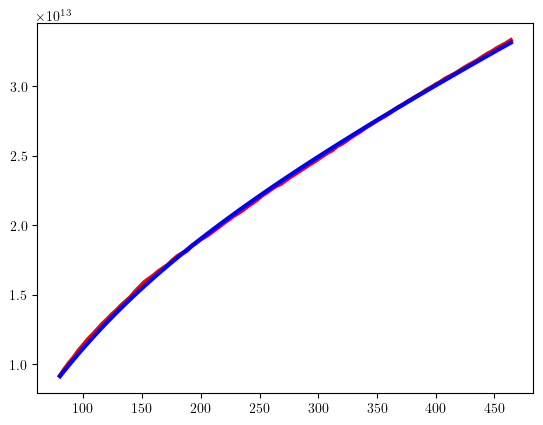

In [37]:
# plt.plot(xdata,ydata, lw=3, c='r', label='PdCoO$_2$')
# plt.plot(xdata,EME_tau(xdata,popt[0],popt[1]), lw=3, c='b', label='PdCoO$_2$')
# plt.plot(Tpdcoo2,EME_tau(Tpdcoo2,popt[0],popt[1]), lw=3, c='g', label='PdCoO$_2$')

plt.plot(xdata,ydata, lw=3, c='r', label='PdCoO$_2$')
plt.plot(xdata,EME_tau(xdata,popt[0], popt[1]), lw=3, c='b', label='PdCoO$_2$')
# plt.plot(Tpdcoo2,EME_tau(Tpdcoo2,popt[0]), lw=3, c='g', label='PdCoO$_2$')

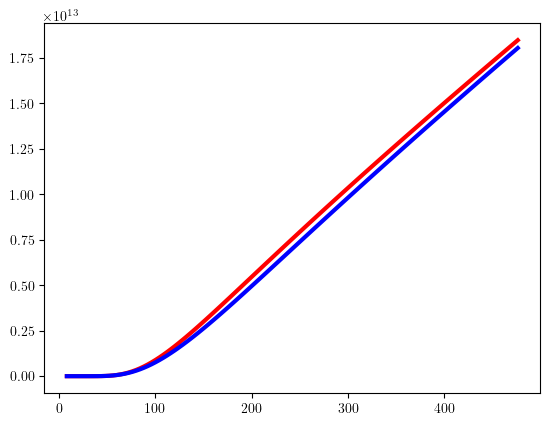

In [38]:
# plt.plot(xdata,ydata, lw=3, c='r', label='PdCoO$_2$')
# plt.plot(xdata,EME_tau(xdata,popt[0],popt[1]), lw=3, c='b', label='PdCoO$_2$')
# plt.plot(Tpdcoo2,EME_tau(Tpdcoo2,popt[0],popt[1]), lw=3, c='g', label='PdCoO$_2$')

plt.plot(Tpdcoo2,E_tau(Tpdcoo2, popt[0],2*popt[1]), lw=3, c='r', label='PdCoO$_2$')
# plt.plot(xdata,EME_tau(xdata,popt[0], popt[1])-K_tau(xdata), lw=3, c='b', label='PdCoO$_2$')
plt.plot(Tpdcoo2,EME_tau(Tpdcoo2,popt[0], popt[1])-K_tau(Tpdcoo2), lw=3, c='b', label='PdCoO$_2$')

# plt.yscale('log')
# plt.plot(Tpdcoo2,EME_tau(Tpdcoo2,popt[0]), lw=3, c='g', label='PdCoO$_2$')

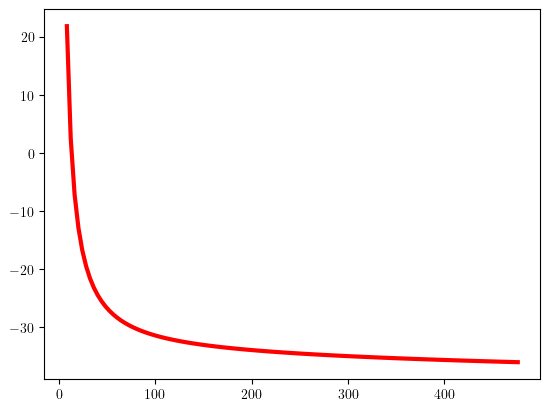

In [39]:

plt.plot(Tpdcoo2,-np.log(E_tau(Tpdcoo2, popt[0],popt[1])*(Tpdcoo2)), lw=3, c='r', label='PdCoO$_2$')
# plt.plot(xdata,EME_tau(xdata,popt[0], popt[1])-K_tau(xdata), lw=3, c='b', label='PdCoO$_2$')
# plt.plot(Tpdcoo2,EME_tau(Tpdcoo2,popt[0], popt[1])-K_tau(Tpdcoo2), lw=3, c='b', label='PdCoO$_2$')

# plt.yscale('log')

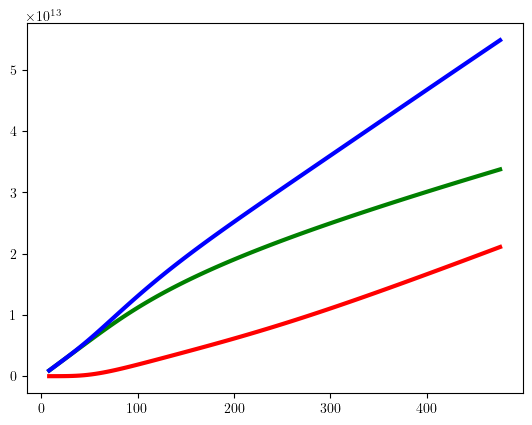

In [40]:
plt.plot(Tpdcoo2,EME_tau(Tpdcoo2,popt[0],popt[1]), lw=3, c='g', label='PdCoO$_2$')
plt.plot(Tpdcoo2,EA_tau(Tpdcoo2, poptEA[0],poptEA[1], poptEA[2],poptEA[3]), lw=3, c='r', label='PdCoO$_2$')
plt.plot(Tpdcoo2,EA_tau(Tpdcoo2, poptEA[0],poptEA[1], poptEA[2],poptEA[3])+EME_tau(Tpdcoo2,popt[0],popt[1]), lw=3, c='b', label='PdCoO$_2$')

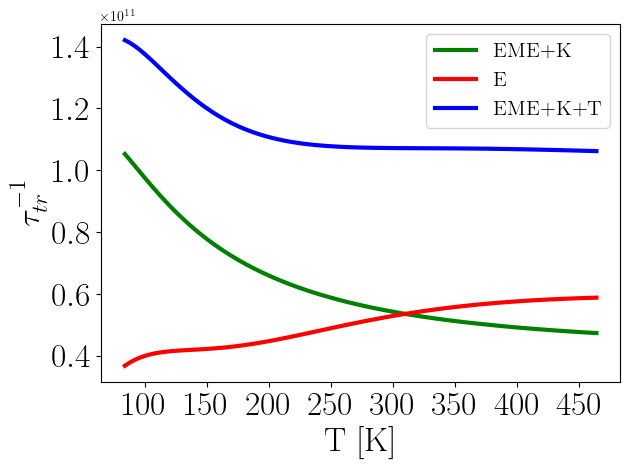

In [41]:
dt=xdata[1]-xdata[0]
plt.plot(xdata[1:],np.diff(EME_tau(xdata,popt[0],popt[1]))/dt, lw=3, c='g', label='EME+K')
plt.plot(xdata[1:],np.diff(EA_tau(xdata, poptEA[0],poptEA[1], poptEA[2],poptEA[3]))/dt, lw=3, c='r', label='E')
plt.plot(xdata[1:],np.diff(EA_tau(xdata, poptEA[0],poptEA[1], poptEA[2],poptEA[3])+EME_tau(xdata,popt[0],popt[1]))/dt, lw=3, c='b', label='EME+K+T')
plt.xlabel('T [K]',size=24)
plt.ylabel(r'$\tau_{tr}^{-1}$',size=24)
plt.yticks(size=24)
plt.xticks(size=24)
plt.legend( prop={'size': 15})
plt.tight_layout()
plt.savefig("fig2_cr.png", dpi=400)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


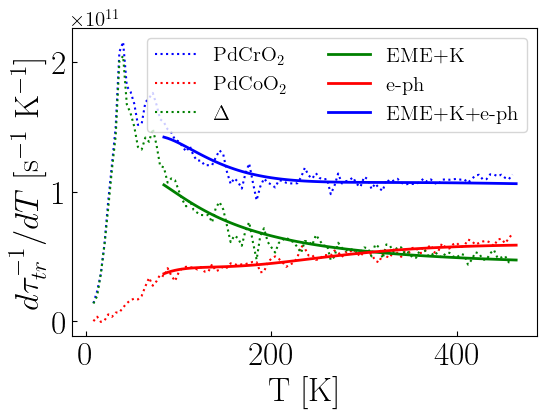

In [42]:
dt=xdata[1]-xdata[0]
lw1=1.5
lw2=2
fig, ax = plt.subplots(1, 1, figsize=[6, 4])


inn=4
ax.plot(Tpdcro2[:-inn],np.gradient(Tau_inv_pdcro2[:-inn])/dt, lw=lw1, c='b',ls=':', label='PdCrO$_2$')
ax.plot(Tpdcoo2[:-inn],np.gradient(Tau_inv_pdcoo2[:-inn])/dt, lw=lw1, c='r',ls=':', label='PdCoO$_2$')
ax.plot(Tpdcro2[:-inn],np.gradient(Tau_inv_pdcro2[:-inn]-Tau_inv_pdcoo2[:-inn])/dt, lw=lw1,ls=':', c='g', label='$\Delta$')

ax.plot(xdata[1:],np.diff(EME_tau(xdata,popt[0],popt[1]))/dt, lw=lw2, c='g', label='EME+K')
ax.plot(xdata[1:],np.diff(EA_tau(xdata, poptEA[0],poptEA[1], poptEA[2],poptEA[3]))/dt, lw=lw2, c='r', label='e-ph')
ax.plot(xdata[1:],np.diff(EA_tau(xdata, poptEA[0],poptEA[1], poptEA[2],poptEA[3])+EME_tau(xdata,popt[0],popt[1]))/dt, lw=lw2, c='b', label='EME+K+e-ph')
# ax.plot(xdata,EME_tau(xdata,popt[0],popt[1])/xdata, lw=3, c='g', label='EME+K')
# ax.plot(xdata,EA_tau(xdata, poptEA[0],poptEA[1], poptEA[2],poptEA[3])/xdata, lw=3, c='r', label='e-ph')
# ax.plot(xdata,EA_tau(xdata, poptEA[0],poptEA[1], poptEA[2],poptEA[3])/xdata+EME_tau(xdata,popt[0],popt[1])/xdata, lw=3, c='b', label='EME+K+e-ph')

ax.set_xlabel('T [K]',size=24)
ax.set_ylabel(r'$d\tau_{tr}^{-1}/dT$ [s$^{-1}$ K$^{-1}$]',size=24)
ax.tick_params(axis='x', labelsize=24,direction="in" )
ax.tick_params(axis='y', labelsize=24,direction="in" )
ax.legend( prop={'size': 15}, ncol=2)
ax.yaxis.offsetText.set_fontsize(15)
# plt.tight_layout()
plt.savefig("linear_cr.eps", dpi=500, bbox_inches='tight')
plt.show()

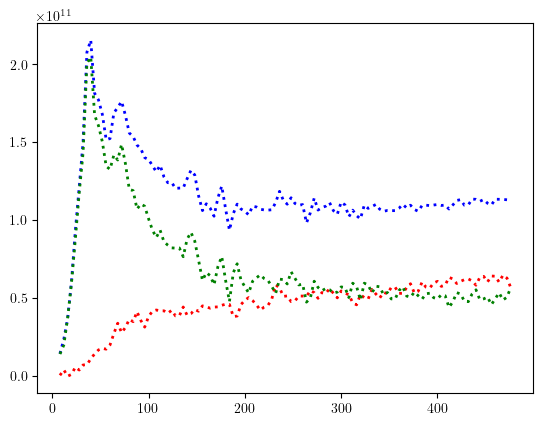

In [43]:
dt=xdata[1]-xdata[0]

lw1=2
lw2=2
plt.plot(Tpdcro2,np.gradient(Tau_inv_pdcro2)/dt, lw=lw1, c='b',ls=':', label='PdCrO$_2$')
plt.plot(Tpdcoo2,np.gradient(Tau_inv_pdcoo2)/dt, lw=lw1, c='r',ls=':', label='PdCoO$_2$')
plt.plot(Tpdcro2,np.gradient(Tau_inv_pdcro2-Tau_inv_pdcoo2)/dt, lw=lw1,ls=':', c='g', label='$\Delta$')

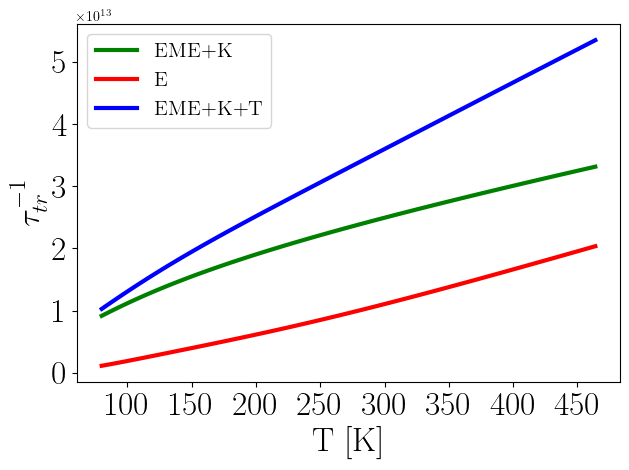

In [44]:
plt.plot(xdata,EME_tau(xdata,popt[0],popt[1]), lw=3, c='g', label='EME+K')
plt.plot(xdata,EA_tau(xdata, poptEA[0],poptEA[1], poptEA[2],poptEA[3]), lw=3, c='r', label='E')
plt.plot(xdata,EA_tau(xdata, poptEA[0],poptEA[1], poptEA[2],poptEA[3])+EME_tau(xdata,popt[0],popt[1]), lw=3, c='b', label='EME+K+T')
plt.xlabel('T [K]',size=24)
plt.ylabel(r'$\tau_{tr}^{-1}$',size=24)
plt.yticks(size=24)
plt.xticks(size=24)
plt.legend( prop={'size': 15})
plt.tight_layout()
plt.savefig("fig2_cr.png", dpi=400)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


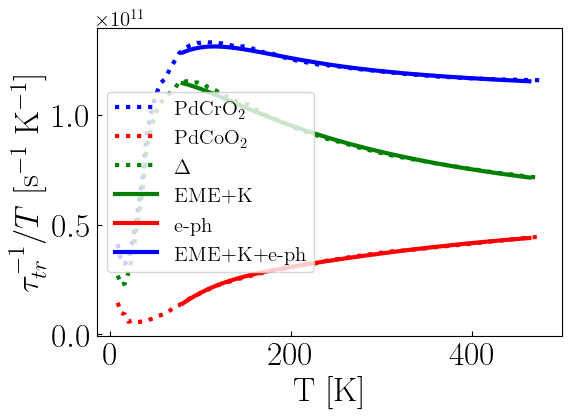

In [45]:
fig, ax = plt.subplots(1, 1, figsize=[6, 4])


ax.plot(Tpdcro2,Tau_inv_pdcro2/Tpdcro2, lw=3, c='b',ls=':', label='PdCrO$_2$')
ax.plot(Tpdcoo2,Tau_inv_pdcoo2/Tpdcoo2, lw=3, c='r',ls=':', label='PdCoO$_2$')
ax.plot(Tpdcro2,Tau_inv_pdcro2/Tpdcoo2-Tau_inv_pdcoo2/Tpdcoo2, lw=3,ls=':', c='g', label='$\Delta$')


ax.plot(xdata,EME_tau(xdata,popt[0],popt[1])/xdata, lw=3, c='g', label='EME+K')
ax.plot(xdata,EA_tau(xdata, poptEA[0],poptEA[1], poptEA[2],poptEA[3])/xdata, lw=3, c='r', label='e-ph')
ax.plot(xdata,EA_tau(xdata, poptEA[0],poptEA[1], poptEA[2],poptEA[3])/xdata+EME_tau(xdata,popt[0],popt[1])/xdata, lw=3, c='b', label='EME+K+e-ph')
ax.set_xlabel('T [K]',size=24)
ax.set_ylabel(r'$\tau_{tr}^{-1}/T$ [s$^{-1}$ K$^{-1}$]',size=24)
ax.tick_params(axis='x', labelsize=24,direction="in" )
ax.tick_params(axis='y', labelsize=24,direction="in" )
ax.legend( prop={'size': 15})
ax.yaxis.offsetText.set_fontsize(15)
# plt.tight_layout()
plt.savefig("linear_cr.eps", dpi=500, bbox_inches='tight')

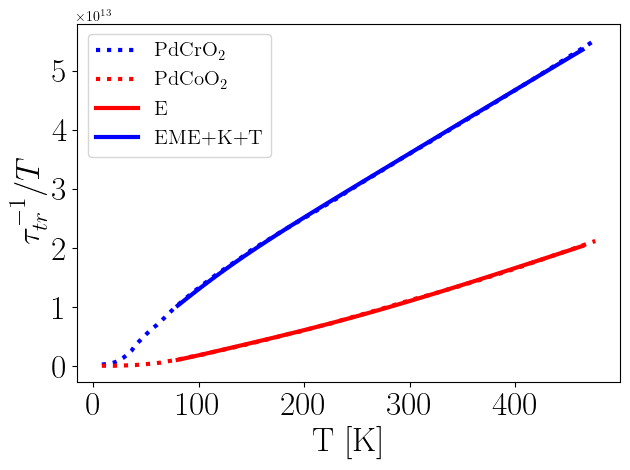

In [46]:
plt.plot(Tpdcro2,Tau_inv_pdcro2, lw=3, c='b',ls=':', label='PdCrO$_2$')
plt.plot(Tpdcoo2,Tau_inv_pdcoo2, lw=3, c='r',ls=':', label='PdCoO$_2$')
# plt.plot(Tpdcro2,Tau_inv_pdcro2-Tau_inv_pdcoo2, lw=3,ls=':', c='g', label='$\Delta$')


# plt.plot(xdata,EME_tau(xdata,popt[0],popt[1]), lw=3, c='g', label='EME+K')
plt.plot(xdata,EA_tau(xdata, poptEA[0],poptEA[1], poptEA[2],poptEA[3]), lw=3, c='r', label='E')
plt.plot(xdata,EA_tau(xdata, poptEA[0],poptEA[1], poptEA[2],poptEA[3])+EME_tau(xdata,popt[0],popt[1]), lw=3, c='b', label='EME+K+T')
plt.xlabel('T [K]',size=24)
plt.ylabel(r'$\tau_{tr}^{-1}/T$',size=24)
plt.yticks(size=24)
plt.xticks(size=24)
plt.legend( prop={'size': 15})
plt.tight_layout()
plt.savefig("fig2_cr.png", dpi=400)

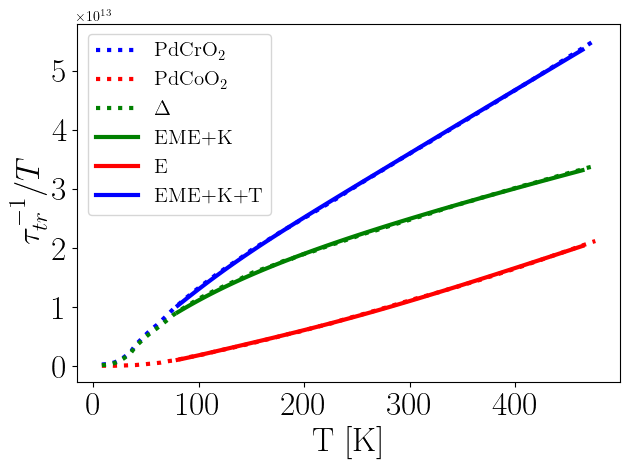

In [47]:
plt.plot(Tpdcro2,Tau_inv_pdcro2, lw=3, c='b',ls=':', label='PdCrO$_2$')
plt.plot(Tpdcoo2,Tau_inv_pdcoo2, lw=3, c='r',ls=':', label='PdCoO$_2$')
plt.plot(Tpdcro2,Tau_inv_pdcro2-Tau_inv_pdcoo2, lw=3,ls=':', c='g', label='$\Delta$')


plt.plot(xdata,EME_tau(xdata,popt[0],popt[1]), lw=3, c='g', label='EME+K')
plt.plot(xdata,EA_tau(xdata, poptEA[0],poptEA[1], poptEA[2],poptEA[3]), lw=3, c='r', label='E')
plt.plot(xdata,EA_tau(xdata, poptEA[0],poptEA[1], poptEA[2],poptEA[3])+EME_tau(xdata,popt[0],popt[1]), lw=3, c='b', label='EME+K+T')
plt.xlabel('T [K]',size=24)
plt.ylabel(r'$\tau_{tr}^{-1}/T$',size=24)
plt.yticks(size=24)
plt.xticks(size=24)
plt.legend( prop={'size': 15})
plt.tight_layout()
plt.savefig("fig2_cr.png", dpi=400)

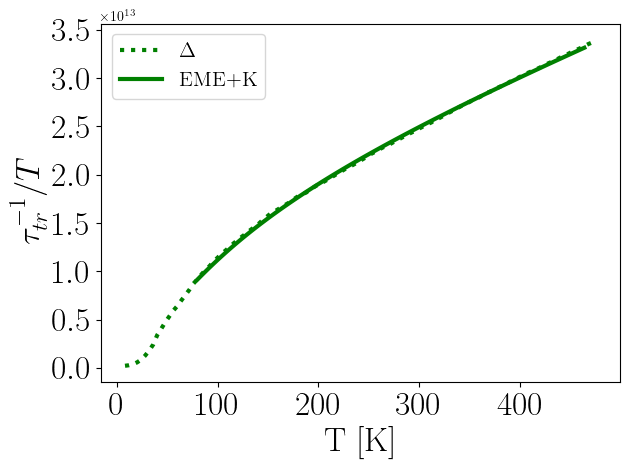

In [48]:
# plt.plot(Tpdcro2,Tau_inv_pdcro2, lw=3, c='b',ls=':', label='PdCrO$_2$')
# plt.plot(Tpdcoo2,Tau_inv_pdcoo2, lw=3, c='r',ls=':', label='PdCoO$_2$')
plt.plot(Tpdcro2,Tau_inv_pdcro2-Tau_inv_pdcoo2, lw=3,ls=':', c='g', label='$\Delta$')


plt.plot(xdata,EME_tau(xdata,popt[0],popt[1]), lw=3, c='g', label='EME+K')
# plt.plot(xdata,EA_tau(xdata, poptEA[0],poptEA[1], poptEA[2],poptEA[3]), lw=3, c='r', label='E')
# plt.plot(xdata,EA_tau(xdata, poptEA[0],poptEA[1], poptEA[2],poptEA[3])+EME_tau(xdata,popt[0],popt[1]), lw=3, c='b', label='EME+K+T')
plt.xlabel('T [K]',size=24)
plt.ylabel(r'$\tau_{tr}^{-1}/T$',size=24)
plt.yticks(size=24)
plt.xticks(size=24)
plt.legend( prop={'size': 15})
plt.tight_layout()
plt.savefig("fig2_cr.png", dpi=400)

In [49]:
(alpha*np.pi*J*mevtoK/1000,57*mevtoK/1000)

(0.45570863134688344, 0.6614579253511087)

In [50]:
Jc(np.array([0.45570863134688344]),np.array([0.6614579253511087]))

array([0.99443])

In [51]:
o0=57
o02=36
T=1000
((o0*mevtoK/T)**2/(np.cosh( o0*mevtoK/T)- 1 ))

1.928646869383014

In [52]:
((0.5*o02*mevtoK/T)/np.sinh((0.5*o02*mevtoK/T)))**2

0.9855822199366308

# New Fit

In [53]:
popt=[4.00633908e+01, 2.55520073e-02]  #freq in ev and  dimensionless coupling 
poptEA=[3.05098032e+01 ,4.29260171e-02, 1.20400165e+02, 2.38137758e-02] #freq in ev and  dimensionless coupling Ac #freq in ev and  dimensionless coupling opt

omega0=poptEA[2]
omegaD=poptEA[0]
lambda_A=poptEA[1]
lambda_E=poptEA[3]


def EA_tau_2(T,enm):
    
    return enm*A_tau(T,omegaD, lambda_A)+enm*E_tau(T,omega0, lambda_E)

In [54]:
from scipy.optimize import curve_fit
ind=0
poptEA2, pcov = curve_fit(EA_tau_2, Tpdcoo2[ind:], rhopdcoo2[ind:])
print(poptEA2)
print(pcov)

[2.40134956e-13]
[[4.19505881e-32]]


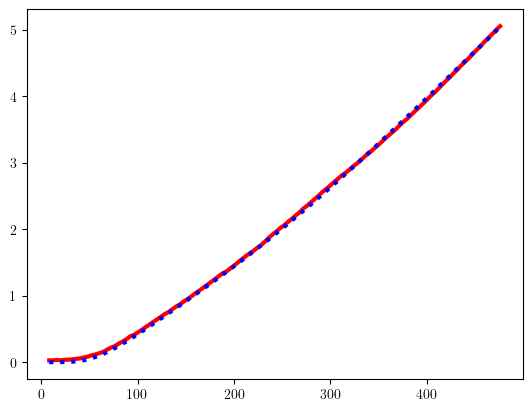

In [55]:
plt.plot(Tpdcoo2,rhopdcoo2, lw=3, c='r', label='PdCoO$_2$')
plt.plot(Tpdcoo2,EA_tau_2(Tpdcoo2, poptEA2[0]), lw=3, c='b', label='PdCoO$_2$', ls=':')

In [56]:

# omega0=30.9553148
def scaleI4(T, omega0):
    return Jc(alpha*np.pi*J*mevtoK/T,omega0*mevtoK/T) 

In [57]:
scaleI4(np.array([10,100,1000,2000]), 10)

array([0.31844803, 0.66402369, 0.99425121, 0.99840467])

In [58]:
2*np.pi*(0.043+0.024+0.026*2)

0.7476990515543708